<a href="https://colab.research.google.com/github/EricoCoutoJr/Processamento-Big-Data/blob/main/Pr%C3%A1tica_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento-Big-Data
##Projeto etapas do processamento do BigData (modelo reduzido)
___________________________



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.graph_objects as go #Para criação e concatenização de graficos
from sklearn.preprocessing import StandardScaler # para relizar a padronização dos dados
from sklearn.preprocessing import MinMaxScaler # outra forma de padronização de dados
from sklearn.cluster import KMeans


## Coletando Dados de Clientes, Estados e Idades

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Abrindo o arquivo de dados arquivados no Google Drive
drive = '/content/drive/MyDrive/103.0 IGTI/ABD/Trabalhos M1/FDA_projetos_datasets/datasets/'
cliente = pd.read_excel(drive+'amostra_dados_clientes.xlsx')
estados= pd.read_csv(drive+'estados_brasileiros.csv', sep=';', encoding='latin-1')
idade = pd.read_csv(drive+'idade_clientes.csv', sep=';')


## Manipuilando o Dataframe dos estados brasileiros

In [ ]:
# Verificando o formato do dataframe
print('Dimensões do Dataset',
    '\nVariáveis: ',estados.shape[1], "\n"
      'Entradas: ', estados.shape[0])

Dimensões do Dataset 
Variáveis:  4 
Entradas:  27


In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


In [ ]:
# Verificando e contando os dados Nulos (NaN)
estados.isnull().sum()


id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
# Preenchendo valores nulos por Brasil na coluna País
# A coluna pais poderia ter sido removida já que o dataset é de estados brasileiros

estados['pais'].fillna(value = 'Brasil', inplace=True)

In [ ]:
# Transformas para Maúscula as siglas dos estados
estados['sigla_estado'] = estados.sigla_estado.str.upper()

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


## Manipulando os dados do dataset idade_clientes.csv


In [ ]:
# Verificando as dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',idade.shape[1], "\n"
      'Entradas: ', idade.shape[0])

Dimensões do Dataset 
Variáveis:  2 
Entradas:  547


In [ ]:
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [ ]:
idade.isnull().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
# Estes dados poderiam ser convertidos em dados do tipo int32 que ocupariam menos espaço e mais rápido processamento
# como o dataset é pequeno este modificação não é necessária

In [ ]:
idade[['idade']].describe()

,idade
count,547.000000
mean,42.791590
std,15.160209
min,16.000000
25%,30.000000
50%,42.000000
75%,55.000000
max,70.000000


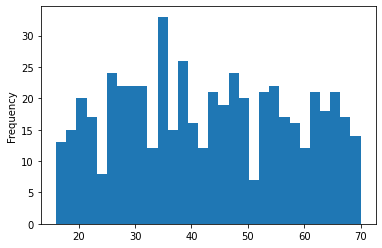

In [ ]:
# Plotando grafico de Histograma de Idades dos Clientes
ax = idade['idade'].plot.hist(bins = 30)

## Manipulando os dados do dataset amostra_dados_cliente.csv

In [ ]:
# Verificando as dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',cliente.shape[1], "\n"
      'Entradas: ', cliente.shape[0])

Dimensões do Dataset 
Variáveis:  5 
Entradas:  222


In [ ]:
cliente.head(10)

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
5,6,198.0,227,Masculino,8
6,7,114.0,131,Masculino,26
7,8,145.0,176,Feminino,25
8,9,191.0,223,Feminino,16
9,10,186.0,221,Masculino,6


In [ ]:
# Verificando a existência de dados ausentes
cliente.isnull().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
# retirando linhas da tabela com valores nulos
cliente.dropna(subset=['peso'], inplace=True)
cliente.isnull().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
# Associando idade ao dataframes
resultado = pd.merge(cliente, idade, how = 'inner', on='id_cliente')
cliente_idade = resultado
cliente_idade.head()

,id_cliente,peso,colesterol,genero,id_estado,idade
0,1,102.0,111,Masculino,23,17
1,2,115.0,135,Masculino,7,28
2,3,115.0,136,Masculino,4,62
3,4,140.0,167,Feminino,24,55
4,5,130.0,158,Masculino,26,44


In [ ]:
resultado = pd.merge(cliente_idade, estados,how='left', on='id_estado')
resultado['sigla_estado'] = resultado.sigla_estado.str.upper()
resultado.reset_index()

,index,id_cliente,peso,colesterol,genero,id_estado,idade,estado,sigla_estado,pais
0,0,1,102.0,111,Masculino,23,17,Roraima,RR,Brasil
1,1,2,115.0,135,Masculino,7,28,Distrito Federal,DF,Brasil
2,2,3,115.0,136,Masculino,4,62,Amazonas,AM,Brasil
3,3,4,140.0,167,Feminino,24,55,Santa Catarina,SC,Brasil
4,4,5,130.0,158,Masculino,26,44,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...,...
217,217,221,180.0,219,Masculino,20,33,Rio Grande do Norte,RN,Brasil
218,218,222,116.0,138,Feminino,15,38,Paraíba,PB,Brasil
219,219,223,144.0,169,Feminino,18,24,Piauí,PI,Brasil
220,220,224,102.0,116,Masculino,6,31,Ceará,CE,Brasil


In [ ]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
resultado['cod_genero'] = le.fit_transform(resultado['genero'])

resultado

,id_cliente,peso,colesterol,genero,id_estado,idade,estado,sigla_estado,pais,cod_genero
0,1,102.0,111,Masculino,23,17,Roraima,RR,Brasil,1
1,2,115.0,135,Masculino,7,28,Distrito Federal,DF,Brasil,1
2,3,115.0,136,Masculino,4,62,Amazonas,AM,Brasil,1
3,4,140.0,167,Feminino,24,55,Santa Catarina,SC,Brasil,0
4,5,130.0,158,Masculino,26,44,Sergipe,SE,Brasil,1
...,...,...,...,...,...,...,...,...,...,...
217,221,180.0,219,Masculino,20,33,Rio Grande do Norte,RN,Brasil,1
218,222,116.0,138,Feminino,15,38,Paraíba,PB,Brasil,0
219,223,144.0,169,Feminino,18,24,Piauí,PI,Brasil,0
220,224,102.0,116,Masculino,6,31,Ceará,CE,Brasil,1


In [ ]:
dados_clientes_final = resultado[['id_cliente','genero','estado','idade','peso','colesterol']]
dados_clientes_final.head()

,id_cliente,genero,estado,idade,peso,colesterol
0,1,Masculino,Roraima,17,102.0,111
1,2,Masculino,Distrito Federal,28,115.0,135
2,3,Masculino,Amazonas,62,115.0,136
3,4,Feminino,Santa Catarina,55,140.0,167
4,5,Masculino,Sergipe,44,130.0,158


# Realizando o agrupamento pelo peso e colesterol

In [ ]:
# criando variável X com as colunas peso e colesterol
X_peso_colesterol = dados_clientes_final.iloc[:,[4,5]].values
X_peso_colesterol.shape



(222, 2)

In [ ]:
X_peso_colesterol[:10]

array([[102., 111.],
       [115., 135.],
       [115., 136.],
       [140., 167.],
       [130., 158.],
       [198., 227.],
       [114., 131.],
       [145., 176.],
       [191., 223.],
       [186., 221.]])

# Normalizando os dados
Como os dados estão em uma escala muito diferente, precisamos normalizar os dados colocando no mesmo padrão e na mesma escala. Como o Kmeans realiza os calculos baseado na distancia, devemos padronizar os dados afim de que um atributo não seja considerado mais importanet do que o outro.

In [ ]:
# O StandardScaler transforma os dados de forma a obter média 0 e desvio padrão 1.
normalizar_dados = StandardScaler()
#normalizar_dados = MinMaxScaler()
X_peso_colesterol = normalizar_dados.fit_transform(X_peso_colesterol)
#X_peso_colesterol.columns = cols
X_peso_colesterol[:10]

array([[-1.29512678, -1.45612943],
       [-0.87750266, -0.84954166],
       [-0.87750266, -0.82426717],
       [-0.07437935, -0.04075796],
       [-0.39562867, -0.26822838],
       [ 1.78886673,  1.47571146],
       [-0.90962759, -0.95063962],
       [ 0.08624531,  0.18671245],
       [ 1.5639922 ,  1.3746135 ],
       [ 1.40336754,  1.32406452]])

# Calculando o número de Cluster
Para calcular o número de cluster vamos utilizar o metodo do cotovelo 

WCSS é a soma da distância quadrada entre cada ponto e o centróide em um cluster

In [ ]:
# Usando dados Normalizados com StandardScaler
wcss_peso_colesterol = [] # Cria uma lista vazia
for i in range(1,11):
  # Executa o kmeans para todos os clusters e random_state = 0  para fixar e obter os mesmos resultados
  kmeans_peso_colesterol = KMeans(n_clusters = i)
  # realiza o treinamento
  kmeans_peso_colesterol.fit(X_peso_colesterol)
  # adiciona na lista os valores de wcss
  wcss_peso_colesterol.append(kmeans_peso_colesterol.inertia_) 


In [ ]:
#Visualizando os valores de wcss com dados Normalizados com StandardScaler
for i in range(len(wcss_peso_colesterol)):
  print('Cluster:', i ,'- Valor do wcss:', wcss_peso_colesterol[i] )
  

Cluster: 0 - Valor do wcss: 443.9999999999999
Cluster: 1 - Valor do wcss: 104.9375670803149
Cluster: 2 - Valor do wcss: 45.85129957769204
Cluster: 3 - Valor do wcss: 26.53326986499943
Cluster: 4 - Valor do wcss: 17.40585305072378
Cluster: 5 - Valor do wcss: 11.733548480238051
Cluster: 6 - Valor do wcss: 8.5860104586815
Cluster: 7 - Valor do wcss: 6.708217599273235
Cluster: 8 - Valor do wcss: 5.313249033705636
Cluster: 9 - Valor do wcss: 4.559635635315456


# Criando gráfico para melhor visualização

In [ ]:
grafico_cotovelo_peso_colesterol = px.line( x= range(1,11), y=wcss_peso_colesterol)
grafico_cotovelo_peso_colesterol.show()

In [ ]:
# Considerando que foram definidos 4 grupos de clientes
kmeans_peso_colesterol = KMeans(n_clusters=4, random_state=0)
cluster_peso_colesterol = kmeans_peso_colesterol.fit_predict(X_peso_colesterol)

In [ ]:
# Verifica a classificação dos clusters
cluster_peso_colesterol

array([1, 1, 1, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 3, 0, 2, 1, 3, 3, 0, 3, 1,
       2, 0, 1, 2, 1, 2, 2, 3, 3, 0, 1, 2, 1, 2, 1, 0, 3, 2, 0, 2, 2, 0,
       2, 0, 0, 1, 1, 3, 2, 3, 1, 3, 3, 2, 0, 3, 1, 3, 1, 2, 0, 3, 1, 3,
       2, 0, 0, 0, 0, 3, 2, 1, 0, 2, 1, 0, 0, 1, 3, 0, 1, 1, 3, 0, 1, 3,
       2, 1, 1, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 3, 0, 2, 1, 2, 3, 0,
       3, 1, 2, 0, 1, 2, 1, 2, 2, 3, 2, 0, 3, 1, 2, 1, 2, 1, 0, 3, 2, 3,
       0, 2, 2, 0, 2, 0, 0, 1, 0, 3, 2, 3, 1, 3, 3, 2, 0, 3, 1, 3, 1, 2,
       0, 3, 1, 3, 2, 0, 0, 0, 0, 3, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 1, 1, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0, 2, 2, 1, 0,
       1, 2], dtype=int32)

In [ ]:
df = pd.DataFrame(cluster_peso_colesterol)
df.value_counts()

1    63
0    58
2    57
3    44
dtype: int64

In [ ]:
centroides_peso_colesterol = kmeans_peso_colesterol.cluster_centers_
centroides_peso_colesterol

array([[-0.40615236, -0.32008466],
       [-1.15591874, -1.24189803],
       [ 1.37067901,  1.2757326 ],
       [ 0.41479576,  0.54744836]])

# Gráfico de agrupamento das características do cliente (peso e colesterol)
### Foram divididos em quatro grupos:
1. Alto Risco;
2. Risco Moderado alto;
3. Risco Moderado baixo;
4. Baixo Risco.

In [ ]:
grafico_peso_colesterol = px.scatter(x = X_peso_colesterol[:,1], y = X_peso_colesterol[:,0], color = cluster_peso_colesterol)
grafico_centroide_peso_colesterol = px.scatter(x = centroides_peso_colesterol[:,1], y = centroides_peso_colesterol[:,0], size = [1,1,1,1])
grafico_final_petala = go.Figure(data = grafico_peso_colesterol.data + grafico_centroide_peso_colesterol.data)
grafico_final_petala.show()


In [ ]:
dados_clientes_final.insert(loc=6, column='grau_de_risco', value=cluster_peso_colesterol)


In [ ]:
dados_clientes_final

,id_cliente,genero,estado,idade,peso,colesterol,grau_de_risco
0,1,Masculino,Roraima,17,102.0,111,1
1,2,Masculino,Distrito Federal,28,115.0,135,1
2,3,Masculino,Amazonas,62,115.0,136,1
3,4,Feminino,Santa Catarina,55,140.0,167,0
4,5,Masculino,Sergipe,44,130.0,158,0
...,...,...,...,...,...,...,...
217,221,Masculino,Rio Grande do Norte,33,180.0,219,2
218,222,Feminino,Paraíba,38,116.0,138,1
219,223,Feminino,Piauí,24,144.0,169,0
220,224,Masculino,Ceará,31,102.0,116,1
